# 图像增强


图像锐化（增强）是图像处理中的一个常用技术，它旨在增强图像的边缘和细节，使其更加清晰。锐化的原理是加强或增强图像的高频部分。以下是关于图像锐化的主要知识点：

拉普拉斯锐化：
- 拉普拉斯锐化基于二阶导数，其目的是检测图像的快速变化区域，即边缘。
- 一个常见的拉普拉斯滤波器是:
$$
{\rm{kernel}} = \frac{1}{16}\left[ {\begin{array}{*{20}{c}}
0&-1&0\\
-1&5&-1\\
0&-1&0
\end{array}} \right]
$$
将此滤波器应用于图像，并将得到的结果添加到原始图像上，从而实现锐化效果。

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


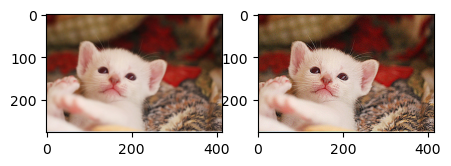

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))


def custom_blur_demo(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)  #锐化
    dst = cv2.filter2D(image, -1, kernel=kernel)
    plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


src = cv2.imread("./images2/sharpen.png")
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
custom_blur_demo(src)

高通滤波锐化：
- 高通滤波可以强调图像的高频部分，例如边缘和噪声。
- 常见的方法是先使用低通滤波器（如均值滤波或高斯滤波）对图像进行平滑，然后从原始图像中减去平滑后的图像，得到高频组件。最后，将高频组件加回到原图上以达到锐化效果。

Unsharp Masking：
- 这是一种常用的图像锐化技术。首先，原始图像被模糊（通常使用高斯滤波），然后模糊的图像从原始图像中减去，得到所谓的"mask"。最后，这个mask被加回到原始图像上。
这种方法的名字可能会引起混淆，因为它是通过增强图像的高频部分来“锐化”图像的。

锐化的副作用：
- 过度锐化可能导致图像上出现不自然的边缘和伪轮廓。
- 锐化也可能增强图像中的噪声。

锐化的应用：
- 锐化通常用于摄影后期处理，帮助增强图像细节。
- 扫描和打印过程中也可能使用锐化，以补偿设备固有的模糊。

- 在进行图像锐化时，通常需要小心调整参数以避免过度锐化，并根据特定的应用和图像内容选择合适的方法。